## Studium przypadku - analiza oszustw

Istnieją dwa podejścia do problemu.

- Prosta analiza pod kontem oszustwa
- Podejście strażnicy


#### Prosta analiza

W tej technice prawdopodobieństwo liczymy jako sumę węzłów oszustów połączonych do nowego węzła przez całkowitą liczbę węzłów połączonych do nowego węzła.


#### Podejście strażnicy

W pierwszym etapie następuje klasyfikacja oszustwa w danej skali dla każdego już znanego oszusta.

Stopień podejrzenia wyraża podejrzenie że dana osoba może być zamieszana w oszustwo.

Obliczanie stopnia podejrzenia:

- Wyznaczamy średnią czterech wskaźników centralności
- Mnożymy ją razy wagę wyniku negatywnego czyli klasyfikację skali oszustwa.
- Normalizujemy wynik dzieląc przez maksymalny wynik negatywny

##### Stopień podejrzenia dla nowego węzła

Aby policzyć stopień nowego węzła należy dodać wszytkie stopnie podejrzenia węzłów połączonych z nowym węzłem i podzielić przez liczbę tych węzłów.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

Pierwszym etapem będzie utworzenie naszego grafu. Węzły czerwone reprezentują wykrytych już oszustów, a zielone osoby niewinne. Każdy węzeł ma przypisany numer od 1 do 10.

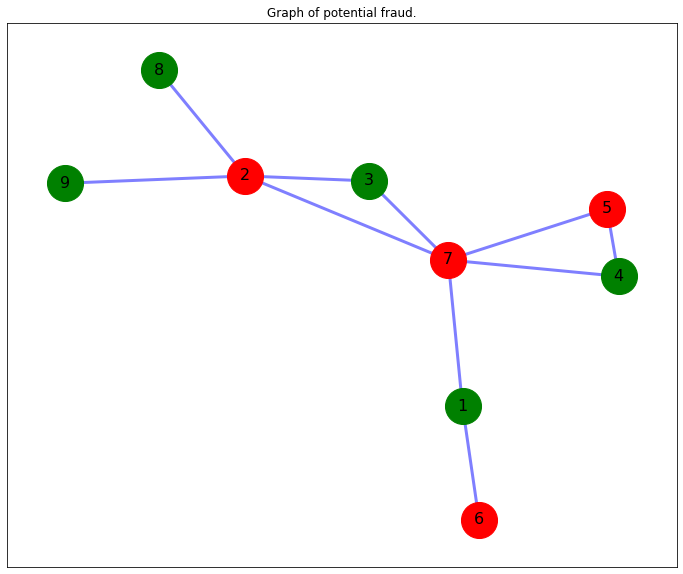

In [14]:
G = nx.Graph()
nodes = range(1, 10)
edges = [(7, 2), (2, 3), (7, 4), (4, 5), (7, 3), (7, 5), (1, 6), (1, 7), (2, 8), (2, 9)]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = nx.spring_layout(G)

fig = plt.figure(figsize=(12, 10))

nx.draw_networkx_nodes(G, pos, nodelist=[1,4,3,8,9], node_color='g', node_size=1300)
nx.draw_networkx_nodes(G,pos,nodelist=[2,5,6,7], node_color="r", node_size=1300)
nx.draw_networkx_edges(G,pos,edges,width=3,alpha=0.5,edge_color='b')

labels = {i: str(i) for i in range(1, 10)}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=16)

plt.title("Graph of potential fraud.")
plt.show()

Kolejnym krokiem będzie wyznaczenie współczynników centralności grafu.

# Wskaźniki centralności

Istnieją różne wskaźniki pozwalające ocenić centralność konkretnego wierzchołka w grafie. Przykładowo mogą one być wyrażone przez wagę danej osoby w grafie.

### Stopniowa centralność grafu

Najpierw należy zdefiniować stopnień węzła. Jeżeli mamy do czynienia z **grafem nie skierowanym** to stopnień węzła określa się jako ilość połączeń danego węzła z innymi. Natomiast w przypadku grafu skierowanego stopień można podzielić na stopień przychodzący oraz wychodzący czyli ilość połączeń do węzła oraz od węzła. Stopniową centralność wierzchołka określa się jako stopień danego wierzchołka podzielona przez ilość wierzchołków minus jeden.


### Miara centralności jako bliskość

Na początku należy zdefiniować odległość między dwoma węzłami. Definije się ją jako najmniejszą ilość połączeń aby dostać się z jednego węzła do drugiego. Współczynnik centralności dla danego wierzchołka określa się jako sumę odległości tego wierzchołka do każdego innego.

### Miara centralności jako oddalenie

<img src="betweeness_centrality.png" />



In [15]:
cent1 = nx.eigenvector_centrality(G)
cent2 = nx.degree_centrality(G)
cent3 = nx.betweenness_centrality(G)
cent4 = nx.closeness_centrality(G)

print("Centralność stopniowa: ", cent2)

Centralność stopniowa:  {1: 0.25, 2: 0.5, 3: 0.25, 4: 0.25, 5: 0.25, 6: 0.125, 7: 0.625, 8: 0.125, 9: 0.125}
